In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.6 MB/s eta 0:00:00


In [4]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
#https://www.youtube.com/watch?v=8FCDpFhd1zk

In [5]:
data = {'Date': ['2019-01-01', '2019-01-07', '2019-01-14', '2019-01-21', '2019-01-28', '2019-02-04','2019-02-11', '2019-02-18', '2019-02-25','2019-03-04', '2019-03-11', '2019-03-18', '2019-03-25', '2019-04-01', '2019-04-07', '2019-04-14', '2019-04-21',
                 '2019-04-28', '2019-05-05', '2019-05-12','2019-05-19','2019-05-26','2019-06-02','2019-06-09','2019-06-16','2019-06-23','2019-06-30',
                 '2019-07-07','2019-07-14','2019-07-21','2019-07-28','2019-08-04','2019-08-11','2019-08-18','2019-08-25','2019-09-01','2019-09-08','2019-09-15','2019-09-22','2019-09-29','2019-10-06','2019-10-13','2019-10-20','2019-10-27','2019-11-03',
                 '2019-11-10','2019-11-17','2019-11-24','2019-12-01','2019-12-08','2019-12-15','2019-12-22','2019-12-29', '2020-01-05', '2020-01-12', '2020-01-19', '2019-01-26', '2020-02-02','2020-02-09', '2020-02-16', '2020-02-23',
                 '2020-03-01', '2020-03-08', '2020-03-15','2020-03-22', '2020-03-29', '2020-04-05', '2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31', '2020-06-07',
                 '2020-06-14', '2020-06-21', '2020-06-28', '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26', '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23', '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20', '2020-09-27',
                 '2020-10-04', '2020-10-11', '2020-10-18','2020-10-25', '2020-11-01', '2020-11-08', '2020-11-15', '2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13', '2020-12-20', '2020-12-27',
                 '2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24', '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21', '2021-02-28', '2021-03-07', '2021-03-14', '2021-03-21', '2021-03-28', '2021-04-04', '2021-04-11', '2021-04-18',
                 '2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16', '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13', '2021-06-20', '2021-06-27', '2021-07-04', '2021-07-11', '2021-07-18', '2021-07-25', '2021-08-01', '2021-08-08',
                 '2021-08-15', '2021-08-22', '2021-08-29', '2021-09-05', '2021-09-12', '2021-09-19', '2021-09-26', '2021-10-03', '2021-10-10', '2021-10-17', '2021-10-24', '2021-10-31', '2021-11-07', '2021-11-14', '2021-11-21', '2021-11-28',
                 '2021-12-05', '2021-12-12', '2021-12-19', '2021-12-26','2022-01-02', '2022-01-09', '2022-01-16', '2022-01-23', '2022-01-30', '2022-02-06', '2022-02-13', '2022-02-20', '2022-02-27', '2022-03-06', '2022-03-13', '2022-03-20',
                 '2022-03-27', '2022-04-03', '2022-04-10', '2022-04-17', '2022-04-24', '2022-05-01', '2022-05-08', '2022-05-15', '2022-05-22', '2022-05-29', '2022-06-05', '2022-06-12', '2022-06-19', '2022-06-26', '2022-07-03', '2022-07-10',
                 '2022-07-17', '2022-07-24', '2022-07-31', '2022-08-07', '2022-08-14', '2022-08-21', '2022-08-28', '2022-09-04', '2022-09-11', '2022-09-18', '2022-09-25', '2022-10-02', '2022-10-09', '2022-10-16', '2022-10-23', '2022-10-30',
                 '2022-11-06', '2022-11-13', '2022-11-20', '2022-11-27', '2022-12-04', '2022-12-11', '2022-12-18', '2022-12-25'],
                      'Servers': [521, 1683, 2037, 974, 966, 1541, 1085, 1505, 1193, 1407, 878, 835, 593, 1184, 1265, 831, 686, 797, 1030, 1280, 1074, 618, 387, 446, 636, 548, 472, 863, 557, 904, 640, 655, 832, 606, 859,
                                  269, 839, 421, 400, 307, 535, 358, 467, 442, 324, 555, 490, 282, 357, 458, 359, 53, 142, 758,  521, 455, 438, 326, 403, 516, 443, 478, 305, 563, 340, 413, 675, 485, 180, 165, 143, 237, 295, 320, 439,
                                  448, 435, 140, 184, 326, 407, 533, 332, 244, 424, 439, 350, 226, 378, 308, 239, 303, 321, 416, 166, 357, 241, 412, 343, 90, 242, 373, 352, 181, 73, 279, 387, 523, 592, 342, 396, 1116, 375, 340, 395, 254,
                                  325, 215, 198, 405, 241, 190, 249, 201, 286, 282, 265, 185, 231, 188, 219, 217, 125, 314, 100, 216, 320, 179, 360, 167, 220, 261, 245, 245, 202, 461, 222, 189, 232, 210, 147, 47, 153, 120, 131, 57, 14,
                                  213, 217, 153, 192, 304, 152, 470, 240, 348, 197, 207, 232, 359, 291, 171, 225, 350, 211, 413, 181, 309, 185, 139, 457, 277, 362, 140, 392, 289, 234, 189, 135, 146, 246, 410, 261, 256, 234, 200, 152, 241,
                                  269, 514, 191, 213, 231, 376, 233, 331, 206, 0, 0]}



df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print(df.shape)
df.head()

(209, 1)


,Servers
Date,
2019-01-01,521
2019-01-07,1683
2019-01-14,2037
2019-01-21,974
2019-01-28,966


<Axes: xlabel='Date'>

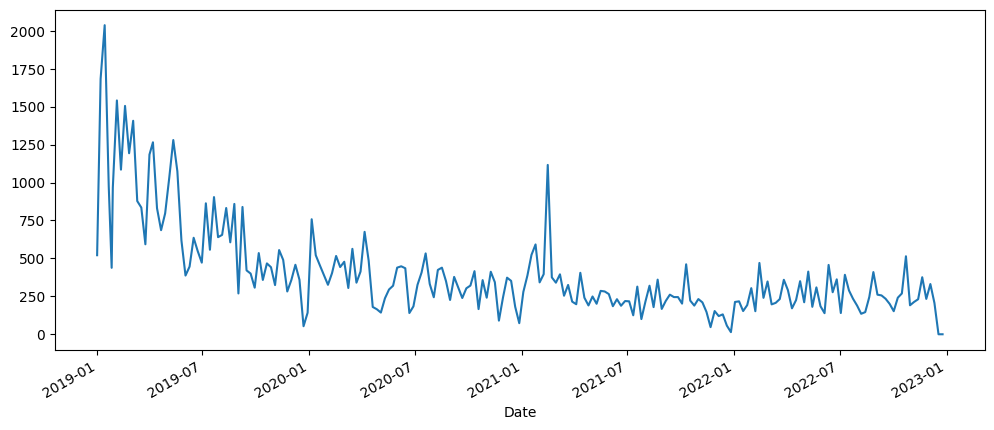

In [6]:
import matplotlib.pyplot as plt
Servers = df['Servers']
Servers.plot(figsize=(12,5))

In [7]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [8]:
ad_test(df['Servers'])

1. ADF :  -3.7595285592732384
2. P-Value :  0.0033496194807727513
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 196
5. Critical Values :
	 1% :  -3.464161278384219
	 5% :  -2.876401960790147
	 10% :  -2.5746921001665974


In [9]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [10]:
stepwise_fit = auto_arima(df['Servers'], trace=True,
suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2781.827, Time=1.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2854.019, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2830.431, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2778.155, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2852.044, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2778.153, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2775.565, Time=0.59 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2807.105, Time=0.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2776.252, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2787.324, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2776.951, Time=0.15 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 6.638 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  209
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1382.783
Date:                Thu, 08 Feb 2024   AIC                           2775.565
Time:                        20:15:10   BIC                           2792.253
Sample:                             0   HQIC                          2782.313
                                - 209                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -5.7380      3.540     -1.621      0.105     -12.676       1.200
ar.L1          0.0743      0.067      1.107      0.268      -0.057       0.206
ar.L2         -0.1878      0.056     -3.349      0.001      -0.298      -0.078
ma.L1         -0.7763      0.057    -13.739      0.000      -0.887      -0.666
sigma2       3.45e+04   2022.542     17.058      0.000    3.05e+04    3.85e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):               188.69
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                             0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
from statsmodels.tsa.arima.model import ARIMA

In [12]:
print(df.shape)
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape,test.shape)

(209, 1)
(179, 1) (30, 1)


In [13]:
model=ARIMA(train['Servers'],order=(2,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Servers   No. Observations:                  179
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1193.212
Date:                Thu, 08 Feb 2024   AIC                           2394.423
Time:                        20:15:56   BIC                           2407.150
Sample:                             0   HQIC                          2399.584
                                - 179                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0471      0.081      0.581      0.562      -0.112       0.206
ar.L2         -0.2132      0.063     -3.410      0.001      -0.336      -0.091
ma.L1         -0.7278      0.075     -9.747      0.000      -0.874      -0.581
sigma2      3.851e+04   2534.167     15.198      0.000    3.35e+04    4.35e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):               156.72
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                             0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

Date
2022-06-05    239.135077
2022-06-12    268.114003
2022-06-19    257.938914
2022-06-26    251.283063
2022-07-03    253.138640
2022-07-10    254.644690
2022-07-17    254.320054
2022-07-24    253.983756
2022-07-31    254.037124
2022-08-07    254.111319
2022-08-14    254.103435
2022-08-21    254.087249
2022-08-28    254.088168
2022-09-04    254.091661
2022-09-11    254.091630
2022-09-18    254.090884
2022-09-25    254.090855
2022-10-02    254.091013
2022-10-09    254.091027
2022-10-16    254.090994
2022-10-23    254.090989
2022-10-30    254.090996
2022-11-06    254.090997
2022-11-13    254.090996
2022-11-20    254.090996
2022-11-27    254.090996
2022-12-04    254.090996
2022-12-11    254.090996
2022-12-18    254.090996
2022-12-25    254.090996
Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

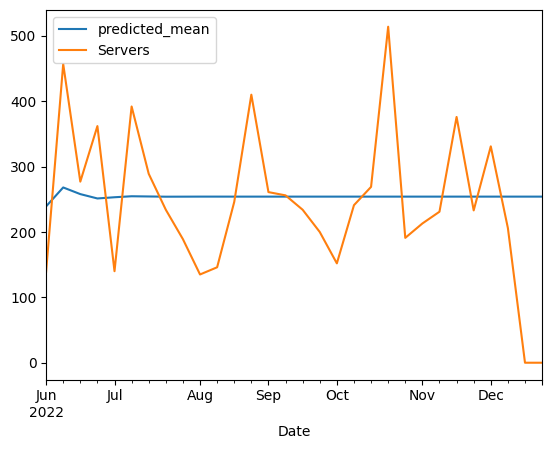

In [15]:
pred.plot(legend=True)
test['Servers'].plot(legend=True)

In [16]:
test['Servers'].mean()

244.13333333333333

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Servers']))
print(rmse)

113.53174660408193
